# HW08 Task 1 - Visualization

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Input dataframes
player_data_1 = pd.read_csv('player_data.csv')
player_data_2 = pd.read_csv('Players.csv')
seosons_data = pd.read_csv('Seasons_Stats.csv')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Dependence shows that the probability of the weight of players is described by the Gaussian distribution


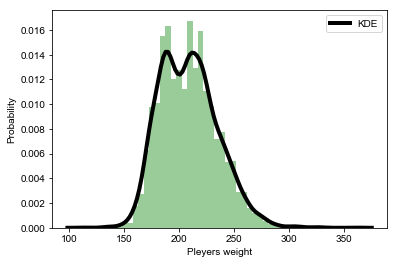

In [3]:
# Probability for weight of players

# New series for extended data
player_data_1['weight_not_nan'] = player_data_1['weight'].fillna(player_data_1['weight'].mean())

#player_data_1['weight_drop_nan'] = player_data_1['weight'].dropna()
ax = sns.distplot(player_data_1['weight_not_nan'], color="g", kde_kws={"color": "k", "lw": 4, "label": "KDE"}, kde=True)
ax.set(xlabel='Pleyers weight', ylabel='Probability')
sns.set_style('darkgrid')

print('Dependence shows that the probability of the weight of players is described by the Gaussian distribution')

Its display than more player are younger then more height he have


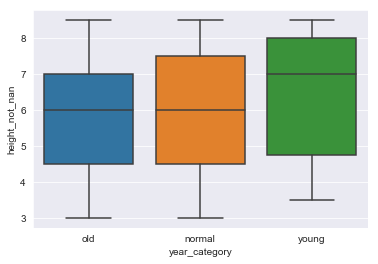

In [4]:
# Dependence describes how the weight of players depends on their age

# Year split function
def birth_date_year(element_series):
    return 2018 - int(element_series.split(' ')[-1])
# elete NANs and splitting year
player_data_1['birth_year'] = player_data_1['birth_date'].dropna().apply(birth_date_year)

# Height avarege function
def height(element_series):
    split_elements = list(map(float, element_series.split('-')))
    return (split_elements[0] + split_elements[1])/2
# Splitting height
player_data_1['height_not_nan'] = player_data_1['height'].dropna().apply(height)

def age_category(age):
    return 'old' if age > 40 else 'young' if age < 22 else 'normal' 

player_data_1['year_category'] = player_data_1['birth_year'].apply(age_category)
sns.boxplot(x='year_category', y='height_not_nan', data=player_data_1);

print('Its display than more player are younger then more height he have')

We can find correlated values by the visual search on the Graphics


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


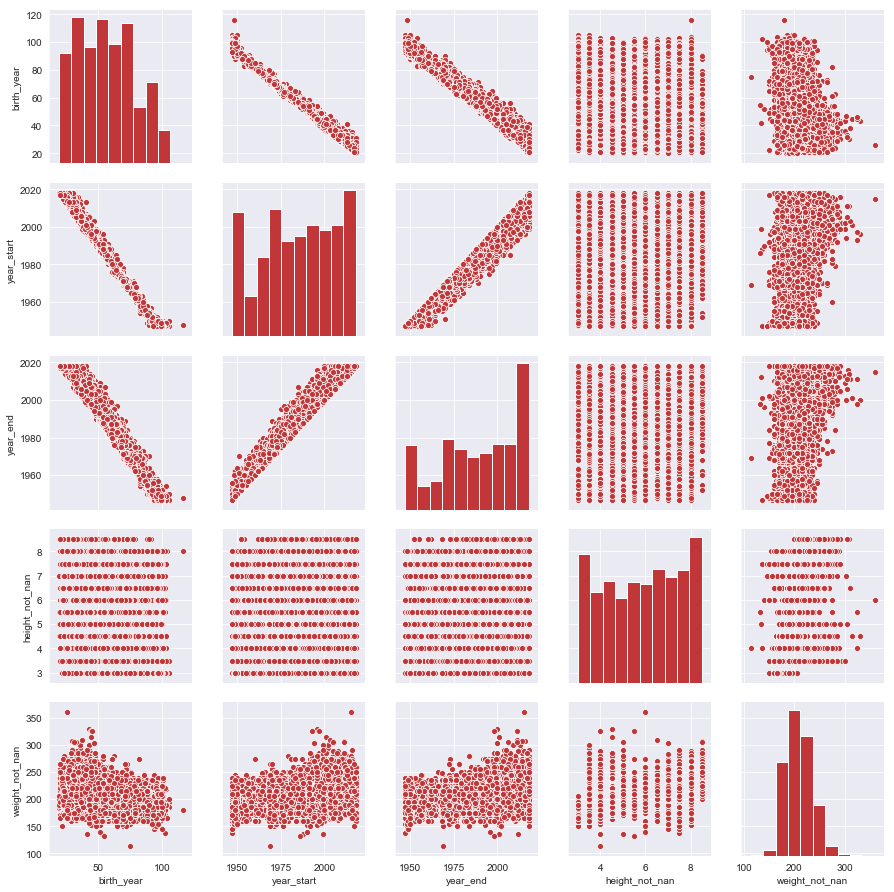

In [ ]:
# Мisual search correlation score

print('We can find correlated values by the visual search on the Graphics')

# Multiplot to visual seach corr values
sns.set_palette(sns.color_palette("RdBu"))
plt_player_data_1 = sns.pairplot(player_data_1[['birth_year', 'year_start', 'year_end','height_not_nan','weight_not_nan']])

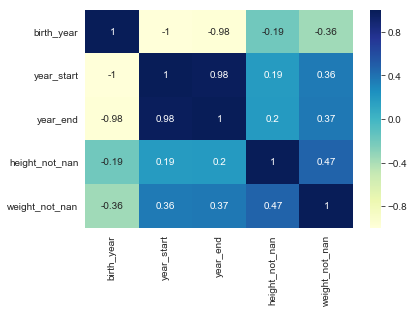

In [ ]:
# Matrix correlation and heatmap
corr_player_data_1 = player_data_1[['birth_year', 'year_start', 'year_end','height_not_nan','weight_not_nan']].corr()
sns.heatmap(corr_player_data_1, annot=True, cmap="YlGnBu")

In [ ]:
# Print correlation data for series
[print('\nFeature correlation for column:',column,'\n\n',corr_player_data_1['height_not_nan'] < 0.4)\
 for column in corr_player_data_1.columns.values];


Feature correlation for column: birth_year 

 birth_year         True
year_start         True
year_end           True
height_not_nan    False
weight_not_nan    False
Name: height_not_nan, dtype: bool

Feature correlation for column: year_start 

 birth_year         True
year_start         True
year_end           True
height_not_nan    False
weight_not_nan    False
Name: height_not_nan, dtype: bool

Feature correlation for column: year_end 

 birth_year         True
year_start         True
year_end           True
height_not_nan    False
weight_not_nan    False
Name: height_not_nan, dtype: bool

Feature correlation for column: height_not_nan 

 birth_year         True
year_start         True
year_end           True
height_not_nan    False
weight_not_nan    False
Name: height_not_nan, dtype: bool

Feature correlation for column: weight_not_nan 

 birth_year         True
year_start         True
year_end           True
height_not_nan    False
weight_not_nan    False
Name: height_not_nan, d

Some signs are linearly dependent


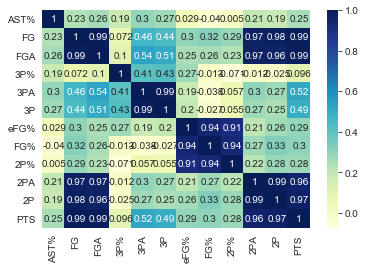

In [ ]:
# Attack featured for players
attac_game_data = seosons_data[['AST%','FG','FGA','3P%','3PA','3P','eFG%','FG%','2P%','2PA','2P','PTS']]

correlation_matrix_attac_data = sns.heatmap(attac_game_data.corr(), annot=True, cmap="YlGnBu")

print('Some signs are linearly dependent')

Not all signs has gauss distribution, most sings have: exponential, poison distributions


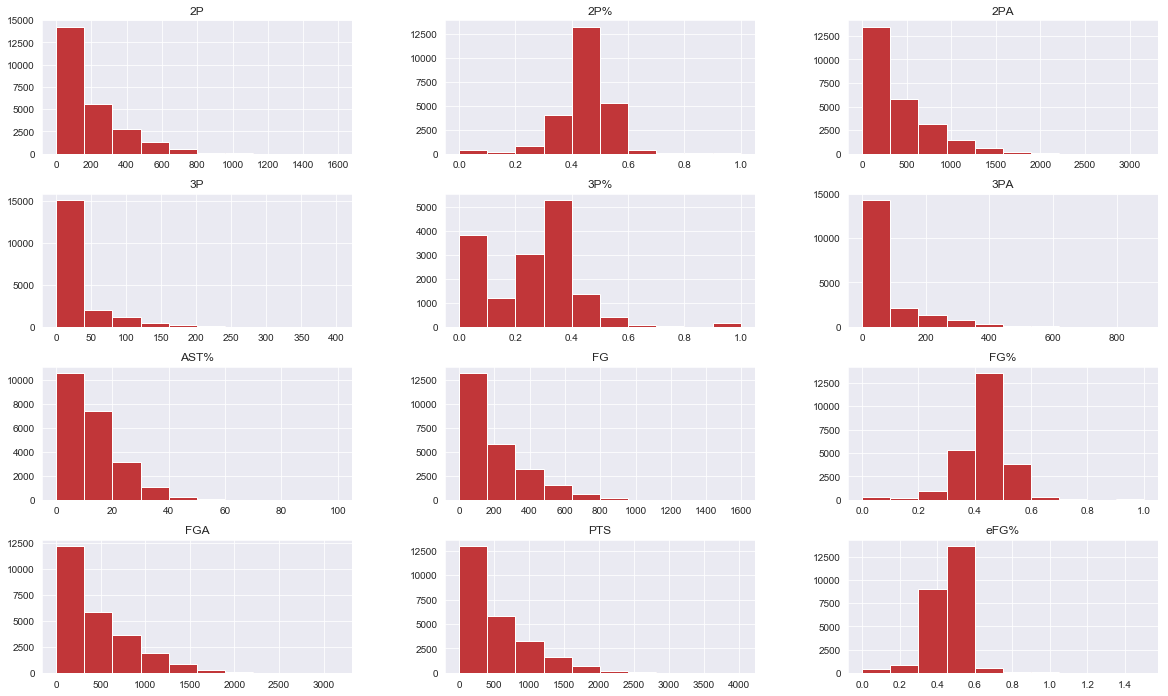

In [ ]:
# Probability density for attac feachers
pdt_check_attac = attac_game_data.hist(figsize=(20,12));
print('Not all signs has gauss distribution, most sings have: exponential, poison distributions')

Information about players age distribution and quality game


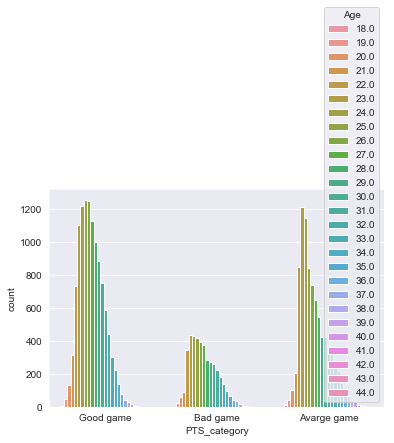

In [ ]:
# Age distribution and quality game

def pts_category(pts):
    return 'Good game' if pts > 400 else 'Avarge game' if pts < 200 else 'Bad game' 

seosons_data['PTS_category'] = seosons_data['PTS'].apply(pts_category)

print('Information about players age distribution and quality game')
sns.countplot(x='PTS_category', hue='Age', data=seosons_data);

Accuracy has growed from 1960 season, but not more then 20%


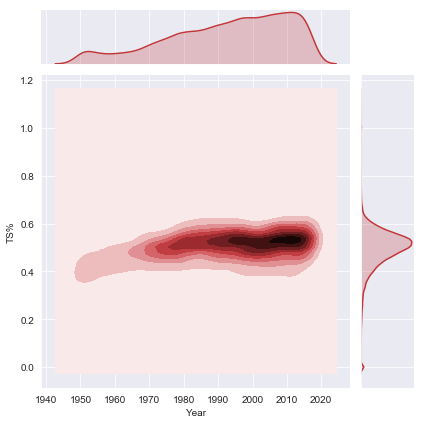

In [ ]:
# Dependence of hit accuracy on game season

sns.jointplot(x='Year', y='TS%', data=seosons_data, kind='kde');
print('Accuracy has growed from 1960 season, but not more then 20%')

Accuracy has Guassian character


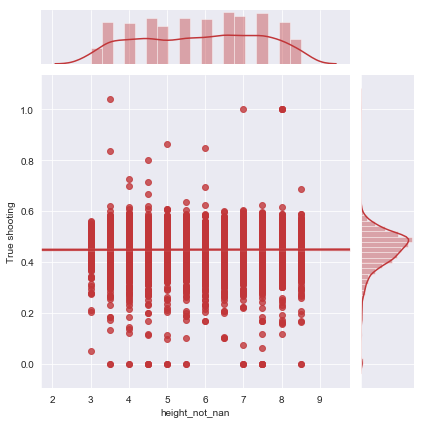

In [ ]:
# New dataframe with join data from different datasets

# Height and True shooting
ext_data = pd.DataFrame(data=player_data_1['height_not_nan'])
ext_data['True shooting'] = seosons_data['TS%'].fillna(seosons_data['TS%'].mean())

# Dependence of Height and True shooting
sns.jointplot(x='height_not_nan', y='True shooting', data=ext_data, kind='reg');

print('Accuracy has Guassian character')

Efficiency of Nebie players is low


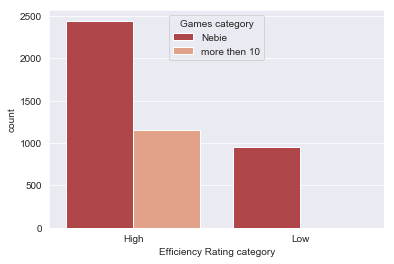

In [ ]:
# Players efficiency 

# Height and True shooting
ext_data = pd.DataFrame(data=player_data_1['height_not_nan'])
ext_data['Efficiency Rating'] = seosons_data['PER'].fillna(seosons_data['PER'].mean())


def efficienc_category(per):
    return 'High' if per > 10 else 'Low' 
ext_data['Efficiency Rating category'] = ext_data['Efficiency Rating'].apply(efficienc_category)


def games_category(game):
    return 'more then 10' if game > 15 else 'Nebie' 
ext_data['Games'] = seosons_data['G'].fillna(seosons_data['G'].mean())
ext_data['Games category'] = ext_data['Efficiency Rating'].apply(games_category)

sns.countplot(x='Efficiency Rating category', hue='Games category', data=ext_data);

print('Efficiency of Nebie players is low')

In [ ]:
# Crosstable of plaer efficiency by category in different teams

pd.crosstab(seosons_data['Tm'], ext_data['Efficiency Rating category']).T

Tm,AND,ATL,BAL,BLB,BOS,BUF,CAP,CHI,CHP,CHS,...,SFW,SHE,STB,STL,SYR,TOT,TRI,WAT,WSB,WSC
Efficiency Rating category,,,,,,,,,,,,,,,,,,,,,
High,16,87,116,84,263,61,11,109,6,13,...,92,17,14,119,136,309,41,21,16,27
Low,0,17,28,11,64,17,3,25,6,0,...,28,0,0,57,34,69,0,0,5,0


In [ ]:
# May be later to hard for my pc

# # Scaller map

# import pylab as plt

# from matplotlib import pyplot as plt
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

# # Droped all symbols signs
# numerical_seosons_data = seosons_data[['VORP', 'FG']].fillna(0)

# scaler = StandardScaler()
# numerical_scaled = scaler.fit_transform(numerical_seosons_data)

# tsne = TSNE(random_state=17)
# tsne_representation = tsne.fit_transform(numerical_scaled)

# plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);